Analyse des données

Préparation des données avec pandas


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import polars as pl
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x :.2f}')
from cleaner import DataCleaner
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tools import (
    logging,
    bins_generator,
    import_datasets
)

Dataset name_basics

Clean, AKA

In [6]:
akas = pl.read_csv(
    'movies_datasets/title_akas.tsv',
    separator = "\t",
    ignore_errors=True
)
akas

titleId,ordering,title,region,language,types,attributes,isOriginalTitle
str,i64,str,str,str,str,str,i64
"""tt0000001""",1,"""Карменсіта""","""UA""","""\N""","""imdbDisplay""","""\N""",0
"""tt0000001""",2,"""Carmencita""","""DE""","""\N""","""\N""","""literal title""",0
"""tt0000001""",3,"""Carmencita - s…","""HU""","""\N""","""imdbDisplay""","""\N""",0
"""tt0000001""",4,"""Καρμενσίτα""","""GR""","""\N""","""imdbDisplay""","""\N""",0
"""tt0000001""",5,"""Карменсита""","""RU""","""\N""","""imdbDisplay""","""\N""",0
"""tt0000001""",6,"""Carmencita""","""US""","""\N""","""imdbDisplay""","""\N""",0
"""tt0000001""",7,"""Carmencita""","""\N""","""\N""","""original""","""\N""",1
"""tt0000001""",8,"""カルメンチータ""","""JP""","""ja""","""imdbDisplay""","""\N""",0
"""tt0000002""",1,"""Le clown et se…","""\N""","""\N""","""original""","""\N""",1


In [4]:
condi = (
    akas["region"] == "FR"
)

akas[condi]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0
23,tt0000003,8,Pauvre Pierrot,FR,\N,imdbDisplay,\N,0
26,tt0000004,2,Un bon bock,FR,\N,imdbDisplay,\N,0
84,tt0000010,17,La sortie de l'usine Lumière,FR,\N,alternative,\N,0
86,tt0000010,19,La sortie des usines Lumière,FR,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
37517186,tt9916844,4,Épisode #3.15,FR,fr,\N,\N,0
37517190,tt9916846,1,Épisode #3.18,FR,fr,\N,\N,0
37517197,tt9916848,1,Épisode #3.17,FR,fr,\N,\N,0
37517206,tt9916850,3,Épisode #3.19,FR,fr,\N,\N,0


In [64]:
df_og = import_datasets("clean_datasets/movies.csv", types="pandas", sep=",")
cleaning = DataCleaner()
df1 = cleaning.fix_values(df_og, "fix_n")
df2 = cleaning.fix_values(df1, "fix_encode")
df = cleaning.df(df2)
logging.info(f"Cleaned : {len(df_og) - len(df)} rows")

"""
Nettoyage des date_sorties nan et modification de la colonne.
Nous avons plusieurs methodes disponible, comme:

df['titre_date_sortie'].fillna(-1, inplace=True)
df.dropna(subset=['titre_date_sortie'], inplace=True)
et une fois que l'on a clean
on applique int a toute la colonne
df['titre_date_sortie'] = df['titre_date_sortie'].astype(int)

"""
df['titre_date_sortie'].fillna(0, inplace=True)
df['titre_date_sortie'] = df['titre_date_sortie'].astype("int64")
df['person_birthdate'] = df['person_birthdate'].astype("int64")
df['titre_duree'] = df['titre_duree'].astype("int64")


df = pd.read_csv('clean_datasets/movies_clean.csv')
ratings = pd.read_csv(
    'movies_datasets/title_ratings.tsv',
    sep = "\t",
)
akas = pd.read_csv(
    'movies_datasets/title_akas.tsv',
    sep = "\t",
)
joined = pd.merge(
    df,
    ratings,
    left_on = "titre_id",
    right_on = "tconst"
)
joined_2 = pd.merge(
    joined,
    akas,
    left_on = "titre_id",
    right_on = "titleId"
)

line = "clean_datasets/movies_clean.csv"
joined.to_csv(line, index=False)

2023-10-24 15:38:00 INFO     Pandas loaded ! Importing movies.csv...


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [38]:
# On filtre les films qui sont déja sortie au cinéma
year_now = datetime.now().year

condi = (
    (df["person_job"].str.contains("act")) &
    (df["titre_date_sortie"] <= year_now)
)
df = df[condi]
actor = df.copy()

"""
La moyenne d'age des acteurs a la date de sortie du film.
Nous calculons la mediane sur cette base.

other KPI, calcul la moyenne des ages en fonction de l'année

"""
# ajouter colonne age pour les personnes
actor["person_age"] = np.where(
    (actor["person_birthdate"] > 1800) &
    (actor["titre_date_sortie"] > 1800) &
    (actor["titre_date_sortie"] - actor["person_birthdate"] >= 0),
    (actor["titre_date_sortie"] - actor["person_birthdate"]),
    0
)
actor.tail()

,titre_id,titre_str,titre_type,titre_date_sortie,titre_date_fin,titre_duree,titre_genres,person_id,person_name,person_birthdate,person_job,person_role,person_index,person_age
4609226,tt9916706,Dankyavar Danka,movie,2013,0,0,Comedy,nm3272130,Ashwini Ekbote,1972,actress,0,4,41
4609232,tt9916730,6 Gunn,movie,2017,0,116,Drama,nm6096005,Devadhar Archit,0,actor,0,1,0
4609233,tt9916730,6 Gunn,movie,2017,0,116,Drama,nm0059461,Sunil Barve,0,actor,0,2,0
4609234,tt9916730,6 Gunn,movie,2017,0,116,Drama,nm13233318,Ganesh Vasant Patil,0,actor,"[""Vishal""]",3,0
4609235,tt9916730,6 Gunn,movie,2017,0,116,Drama,nm4852679,Bhushan Pradhan,0,actor,0,4,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1746766 entries, 0 to 4609235
Data columns (total 13 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   titre_id           object
 1   titre_str          object
 2   titre_type         object
 3   titre_date_sortie  int64 
 4   titre_date_fin     int64 
 5   titre_duree        int64 
 6   titre_genres       object
 7   person_id          object
 8   person_name        object
 9   person_birthdate   int64 
 10  person_job         object
 11  person_role        object
 12  person_index       int64 
dtypes: int64(5), object(8)
memory usage: 186.6+ MB


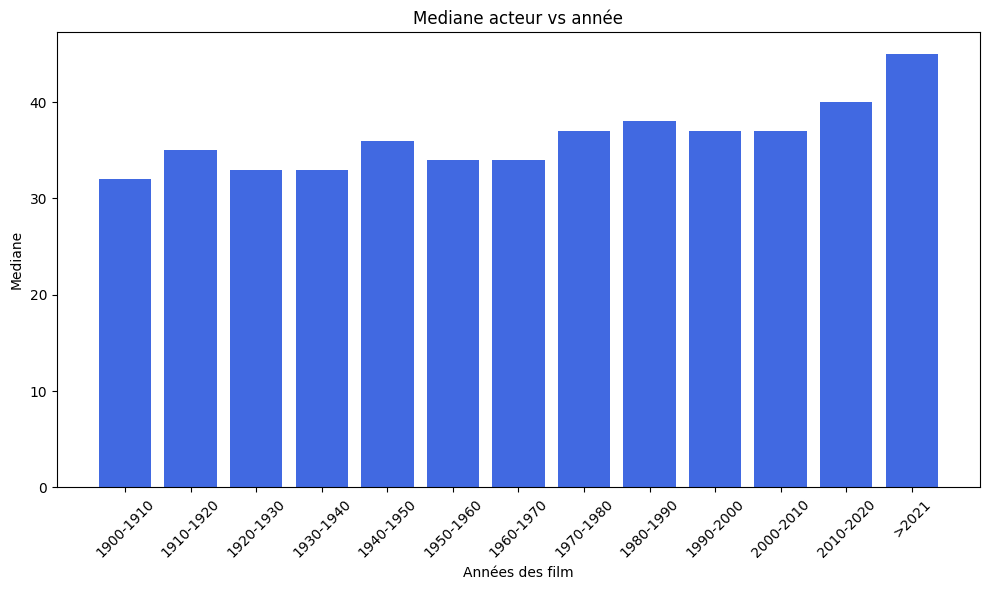

In [59]:
"""
imagine un fonction, qui prendrais en argument une liste de date de
titre de sortie et retourne la moyenne d'age de ces années des acteurs.

# Quels sont les acteurs les plus présents ?
# À quelle période ?
La durée moyenne des films s'allonge ou se raccourcit avec les années ?
Les acteurs de série sont-ils les mêmes qu'au cinéma ?
# Les acteurs ont en moyenne quel âge ?
Quels sont les films les mieux notés ?
Partagent-ils des caractéristiques communes ? etc...

"""

bins, names = bins_generator(actor["titre_date_sortie"].max())

actor["cuts"] = pd.cut(
    actor["titre_date_sortie"],
    bins=bins,
    labels=names
)

actor_median = []
for date in names[1:]:
    condi = (
        (actor["person_age"] != 0) &
        (actor["cuts"] == date)
    )
    # print(f"Mediane for person_age {date} :", actor["person_age"][condi].median())
    actor_median.append(actor["person_age"][condi].median())

plt.figure(figsize=(10,6))
plt.bar(names[1:], actor_median, color="royalblue")
plt.xlabel("Années des film")
plt.ylabel("Mediane")
plt.title("Mediane acteur vs année")
plt.xticks(rotation=45)
plt.tight_layout()

In [43]:
# Top 5 des acteurs all time !
print(actor["person_name"].value_counts().head(5))
# Bottom 5 des acteurs all time !
print(actor["person_name"].value_counts().tail(5))

person_name
Brahmanandam          729
Eddie Garcia          436
Paquito Diaz          356
Mithun Chakraborty    334
Seong-il Shin         326
Name: count, dtype: int64
person_name
Adolfo Natalini        1
Robert Bonotto         1
Megg Howe              1
Daniel Belkin          1
Ganesh Vasant Patil    1
Name: count, dtype: int64


In [44]:
# Top 5 actors by years
for date in names[1:]:
    top5 = actor['person_name'][condi].value_counts().head(5)
    condi = (
        (actor["cuts"] == date)
    )
    top5_str = '\n'.join(str(top5).split('\n')[:-1])

    print(f"Top 5 actors by movies for {date}\n{'-'*20}\n{top5_str}")
    print("-"*20)


Top 5 actors by movies for 1900-1910
--------------------
person_name
Jason Young        114
Eric Roberts        53
Lee Jagow           32
Claudette Young     31
Vernon Wells        28
--------------------
Top 5 actors by movies for 1910-1920
--------------------
person_name
Henny Porten         4
Antônio Cataldi      4
Clara Pontoppidan    4
Philip Bech          4
Alfred Cohn          4
--------------------
Top 5 actors by movies for 1920-1930
--------------------
person_name
Joseph J. Dowling    71
Olga Engl            69
Theodore Roberts     66
Frederik Jacobsen    60
William Russell      60
--------------------
Top 5 actors by movies for 1930-1940
--------------------
person_name
Jun Arai              110
Rintarô Fujima         89
Tasaburo Matsumoto     86
Rokurô Akashi          85
Tsuruko Matsueda       84
--------------------
Top 5 actors by movies for 1940-1950
--------------------
person_name
Sau-Nin Wong    147
Akane Hisano     99
Po-Chuen Chu     94
Itoji Koto       92
Ryûko 

In [45]:
#  World record of the longest documentary
# source :https://fr.wikipedia.org/wiki/Ambianc%C3%A9
longest = actor[actor["titre_duree"] == 43200]
n = longest[["titre_str", "titre_duree"]].iloc[0]
heure = n["titre_duree"] // 60
jours = heure // 24
print(f"Le film le plus long est {n['titre_str']} d'une durée de {heure} heures soit {jours} jours")
# All time median for duration
print(f"All time duration median : {round(actor['titre_duree'].median())} minutes")

Le film le plus long est Ambiancé d'une durée de 720 heures soit 30 jours
All time duration median : 84 minutes


In [46]:
# Median duration for movies between years.
nodup = actor[~actor["titre_str"].duplicated(keep="first")]

for date in names[1:]:
    condi = (
        (nodup["cuts"] == date)
    )
    med = round(nodup["titre_duree"][condi].median())
    print(f"Median durations for movies {date}\nMedian for this years is {med} minutes")
    print("-"*20)

Median durations for movies 1900-1910
Median for this years is 0 minutes
--------------------
Median durations for movies 1910-1920
Median for this years is 49 minutes
--------------------
Median durations for movies 1920-1930
Median for this years is 50 minutes
--------------------
Median durations for movies 1930-1940
Median for this years is 70 minutes
--------------------
Median durations for movies 1940-1950
Median for this years is 83 minutes
--------------------
Median durations for movies 1950-1960
Median for this years is 86 minutes
--------------------
Median durations for movies 1960-1970
Median for this years is 87 minutes
--------------------
Median durations for movies 1970-1980
Median for this years is 90 minutes
--------------------
Median durations for movies 1980-1990
Median for this years is 90 minutes
--------------------
Median durations for movies 1990-2000
Median for this years is 90 minutes
--------------------
Median durations for movies 2000-2010
Median for th

In [ ]:
# print(len(yy[yy["titre_date_sortie"].isna()]))
# yy["titre_date_sortie"].fillna(1678, inplace=True)
# yy["person_birthdate"] = yy["person_birthdate"].astype(int).replace(0, 1678)
# condi = (
#     yy["person_birthdate"] < 1678
# )

# yy.loc[condi, "person_birthdate"] = 1678
# datime_col = ["titre_date_sortie", "person_birthdate"]
# for time in datime_col:
#     yy[time] = pd.to_datetime(yy[time], format="%Y")
# yy["titre_date_sortie"] = yy["titre_date_sortie"].dt.year